## Import Library & Packages

In [38]:
#!pip install --upgrade notebook nbconvert

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Data Import

dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [39]:
import pandas as pd

path = 'https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Customer-Personality-Analysis/main/Data/Raw%20Data/marketing_campaign.csv?token=GHSAT0AAAAAACMXNOPVL73U5HXZIA4R6ATGZOZNF3A'
data = pd.read_csv(path, sep='\t')

## Understanding Data

In [40]:
pd.set_option('display.max_columns', None)
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [41]:
data.info() # check for data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [42]:
data.describe() # numerical data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [43]:
for column in data.select_dtypes(include=['object']).columns:
    print(data[column].value_counts()) # categorical data

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64


## Missing Values

In [44]:
missing_values = data.isnull().sum() # Only column income that has 24 missing values
missing_p = round(24/data.shape[0] * 100, 4) # Hard code in 24
print("Missing Values:", missing_values)
print("Missing Value %:", missing_p, "%") # 1.07% of rows have missing values

Missing Values: ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
Missing Value %: 1.0714 %


In [45]:
missing_income_rows = data[data['Income'].isnull()] # Checking the missing row details
missing_income_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [46]:
# Do not want to delete the missing rows, use median income might not be accurate, so using iterative imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

# separate numerical and categorical values
columns_for_imputation = ['Year_Birth', 'Kidhome', 'Teenhome', 'Income']
data_for_imputation = data[columns_for_imputation].copy()

data_categorical = data[['Education', 'Marital_Status']]

encoder = OneHotEncoder(drop='first')
data_encoded = encoder.fit_transform(data_categorical) 

data_encoded = pd.DataFrame(data_encoded.toarray(), 
                            columns=encoder.get_feature_names_out(['Education', 'Marital_Status']))

# combining back the numerical and categorical values
data_for_imputation = data_for_imputation.reset_index(drop=True)
data_encoded = data_encoded.reset_index(drop=True)

data_combined = pd.concat([data_for_imputation, data_encoded], axis=1)

# impute the missing values
imputer = IterativeImputer()
imputed_data = pd.DataFrame(imputer.fit_transform(data_combined), columns=data_combined.columns)

# use a copy for the new data
data2 = data.copy()
data2.reset_index(drop=True, inplace=True)
imputed_data.reset_index(drop=True, inplace=True)
data2.loc[data2['Income'].isnull(), 'Income'] = imputed_data.loc[data2['Income'].isnull(), 'Income']

In [47]:
# Checking whether got rid of missing values
print("Number of missing values for each column:")
print(data2.isnull().sum())

# Checking whether deleted more values than needed
different_rows_data = len(data) - len(pd.merge(data, data2, how='inner'))
different_rows_data2 = len(data2) - len(pd.merge(data, data2, how='inner'))

print("Number of different rows in data compared to data2:", different_rows_data)
print("Number of different rows in data2 compared to data:", different_rows_data2)

Number of missing values for each column:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64
Number of different rows in data compared to data2: 24
Number of different rows in data2 compared to data: 24


In [48]:
# double checking whether other data is not imputed
check_value = data2[data2['ID'].isin([5524, 2174, 4141, 1994, 5255, 7281])] # first 3 IDs from the non-missing value row & rest from missing value row
check_value # value matches, go to next phase

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
10,1994,1983,Graduation,Married,41345.223983,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,40701.142374,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,65048.006205,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0


## Duplication check

In [49]:
data2[data2.duplicated()] # no duplicated values

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [50]:
data2.describe() # numerical data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52207.086581,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25073.375896,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35434.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Outliers check

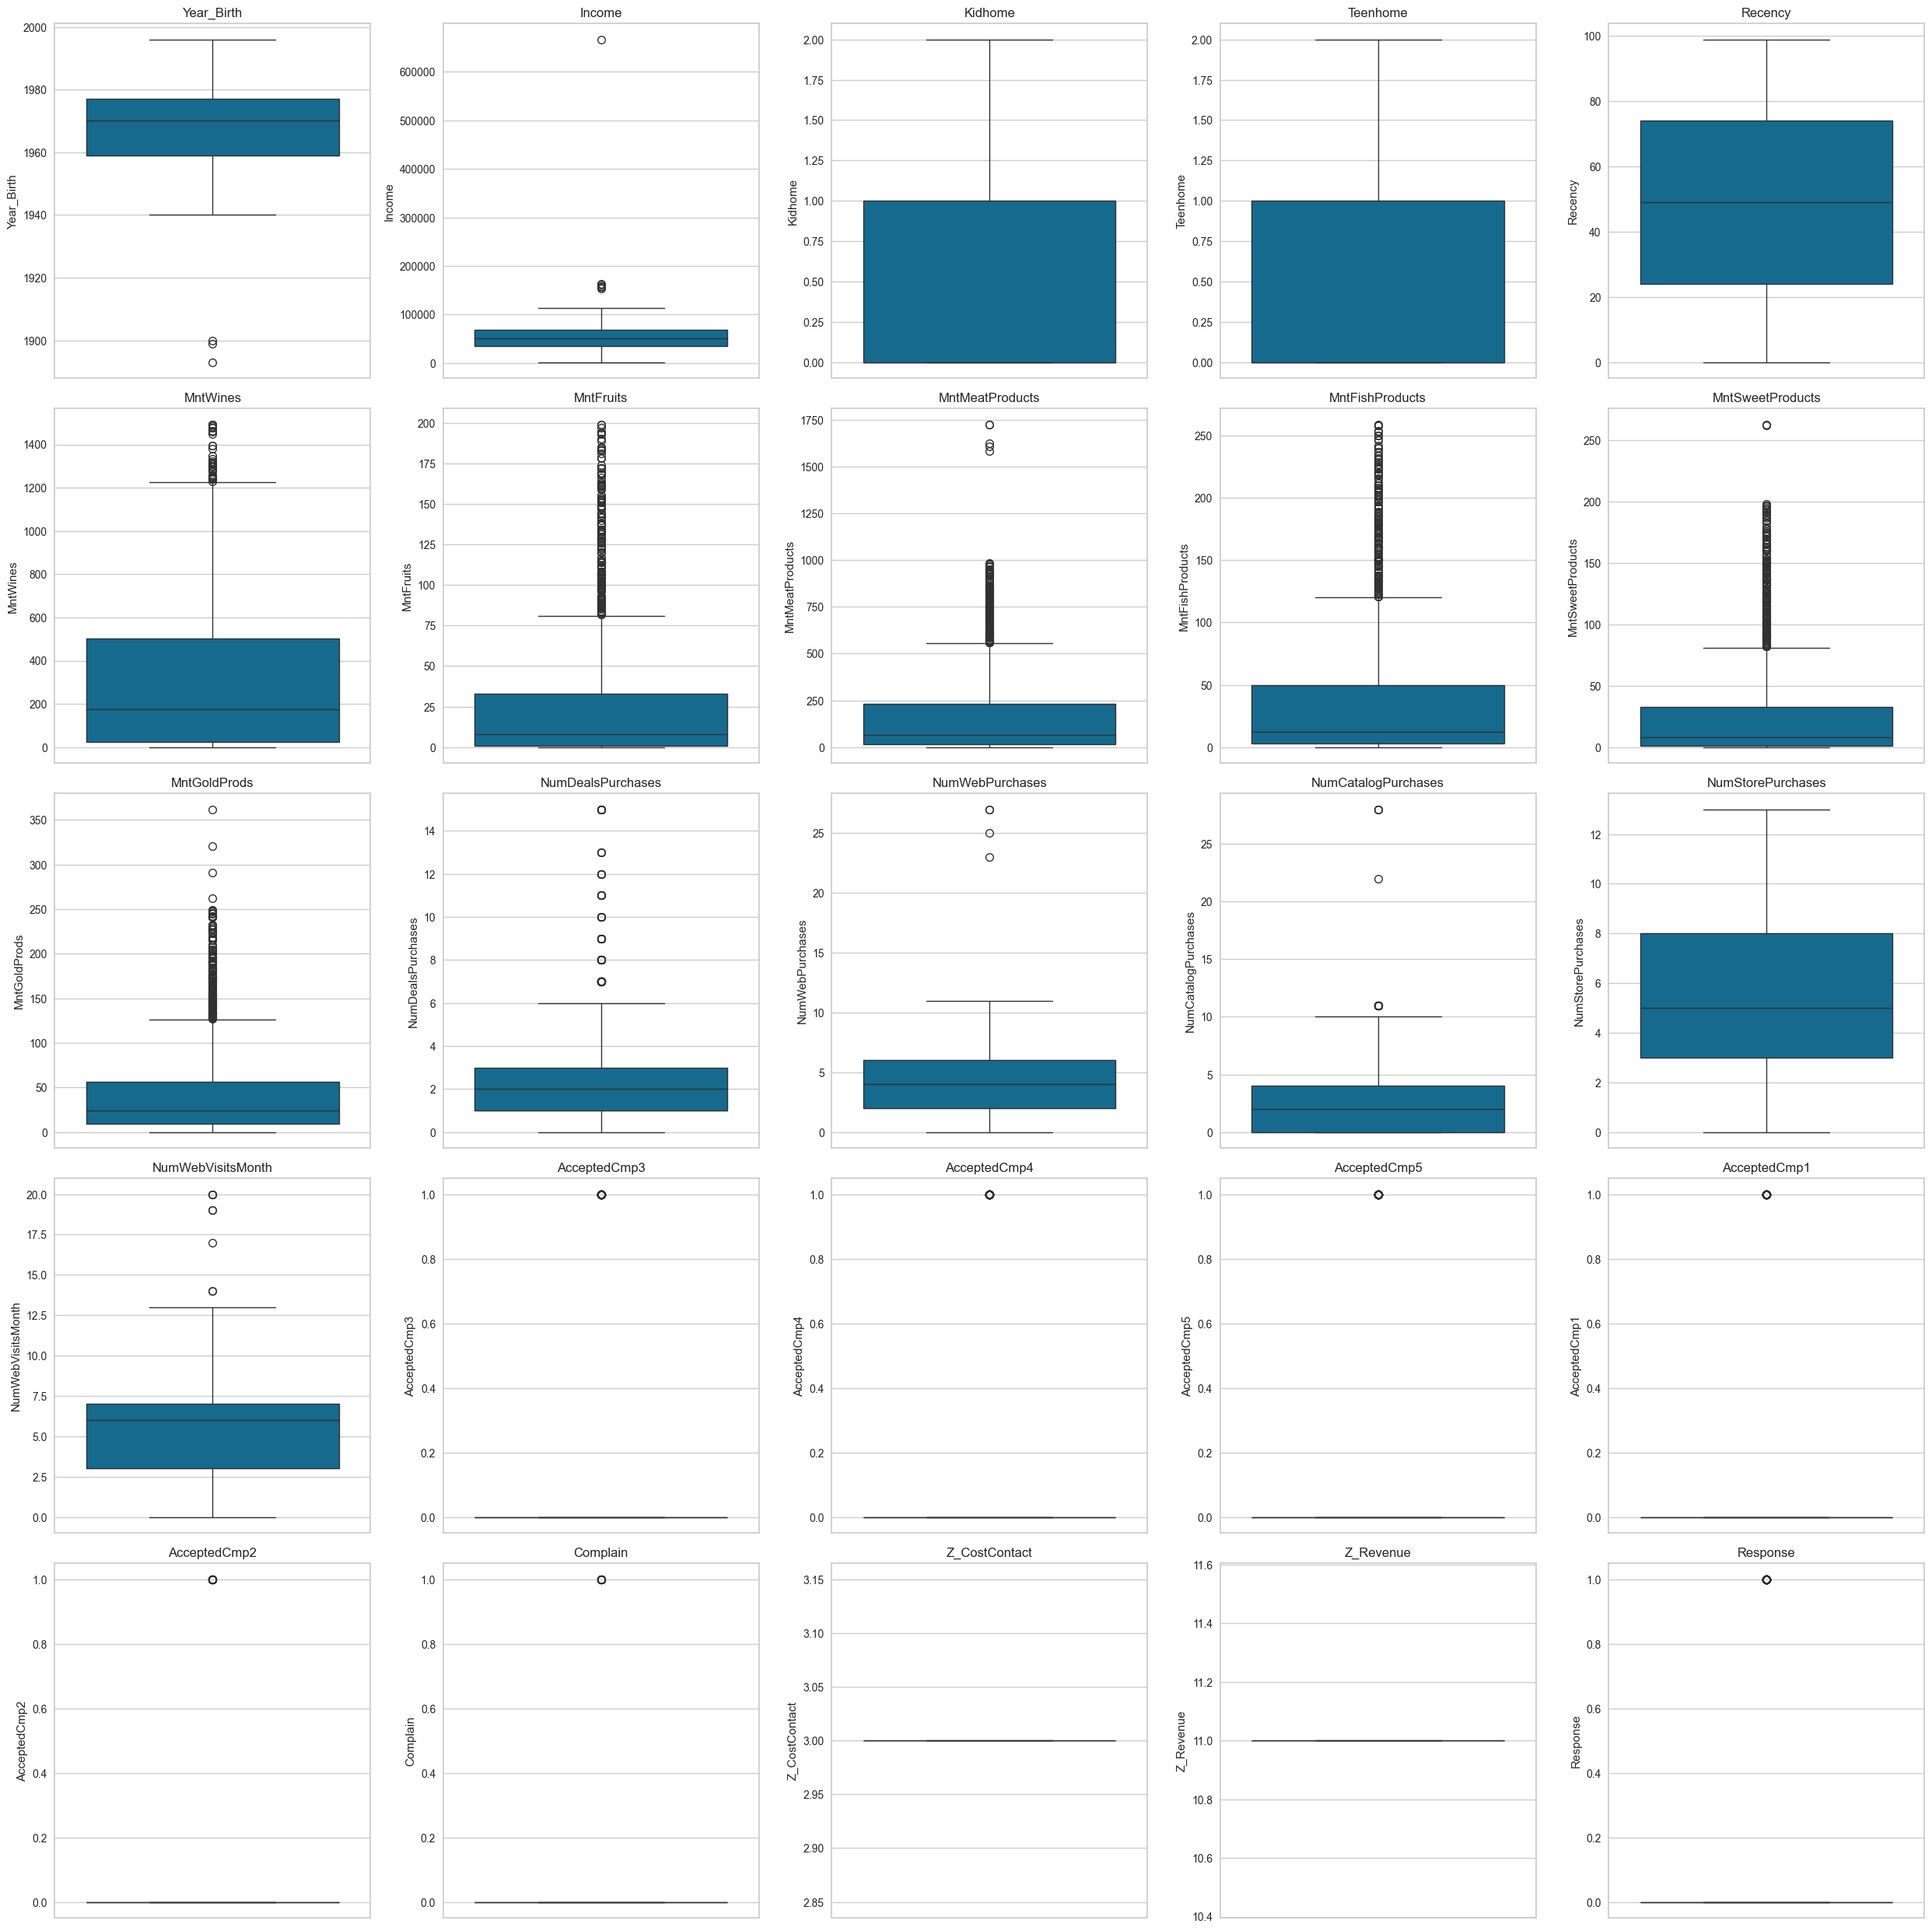

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = data2.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])

num_cols = len(numerical_columns.columns)
num_rows = (num_cols + 4) // 5

plt.figure(figsize=(25, 5 * num_rows))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)
    sns.boxplot(data=numerical_columns[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### Remove Customer with age over 100
They're unlikely to make purchase

In [52]:
data2 = data2[~data2['Year_Birth'].isin([1893, 1899, 1900])]

### Drop extreme high income outlier

In [53]:
data2 = data2[(data2["Income"] < 160000)] 

In [54]:
data2.describe() # numerical data


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.0,2234.0,2234.000000
mean,5592.667413,1968.888988,51823.479831,0.444047,0.506714,49.136974,304.337064,26.291853,166.399731,37.561325,27.102954,44.019696,2.321397,4.091316,2.653089,5.799910,5.323187,0.072963,0.074754,0.072516,0.064458,0.013429,0.008953,3.0,11.0,0.149508
std,3243.972517,11.704269,21209.412805,0.538490,0.544648,28.961593,336.669241,39.737595,223.657780,54.666125,41.311159,52.070413,1.914570,2.778538,2.875078,3.249414,2.423635,0.260134,0.263053,0.259398,0.245623,0.115128,0.094215,0.0,0.0,0.356668
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2832.250000,1959.000000,35395.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,49.500000,174.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8425.250000,1977.000000,68146.500000,1.000000,1.000000,74.000000,504.750000,33.000000,231.750000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,157733.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Collinearity check

### Correlation Matrix

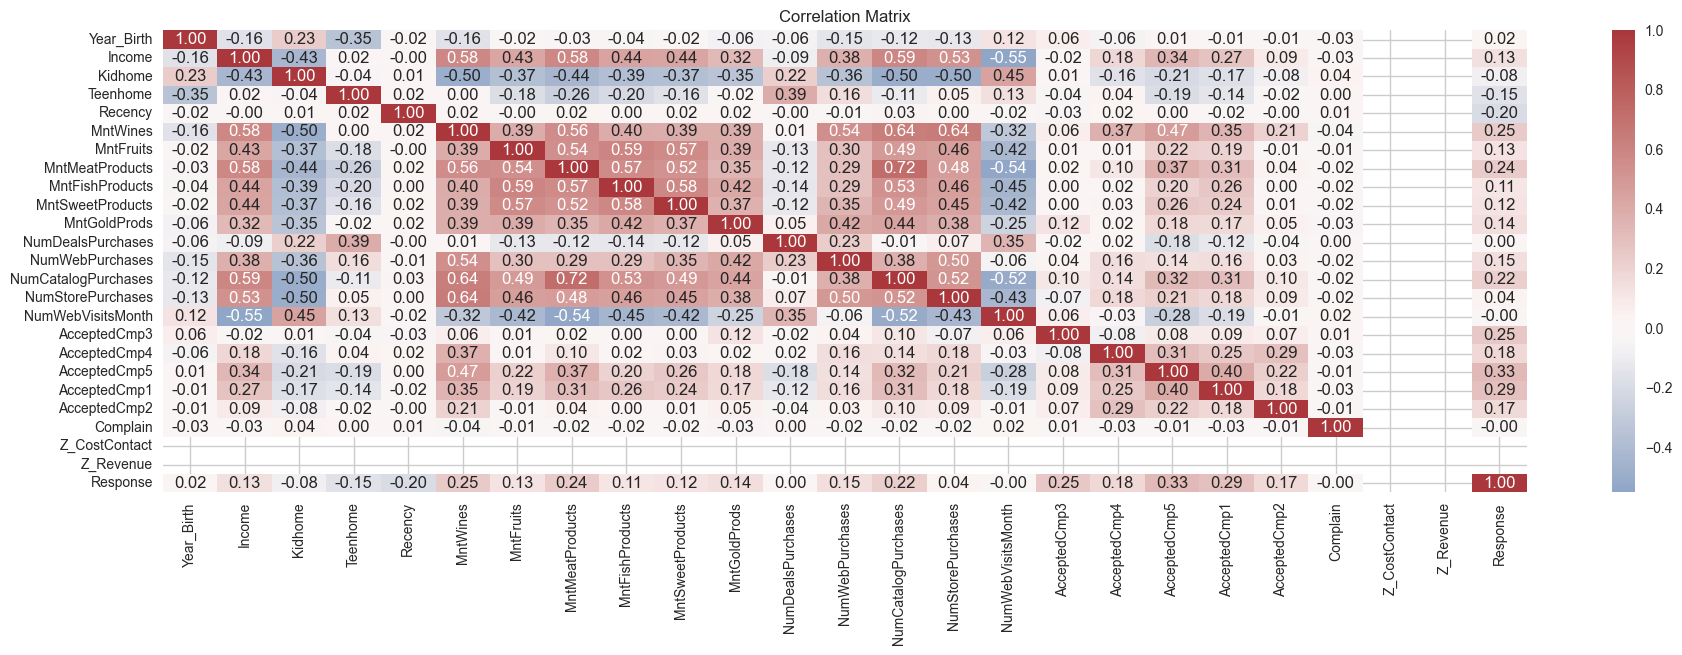

No high correlation.


In [55]:
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(22, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation Matrix')
plt.show()

# Setting a threshold of 80% as high correlation
high_correlation = corr_matrix[((corr_matrix <= -0.8) & (corr_matrix != -1)) | ((corr_matrix >= 0.8) & (corr_matrix != 1))]
if high_correlation.isnull().all().all():
    print("No high correlation.")
else:
    print("Correlation Matrix for values <= -0.8 or >= 0.8 (excluding self-compare):")
    print(high_correlation)

### VIF

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_features = add_constant(numerical_columns)

VIF = pd.Series([variance_inflation_factor(VIF_features.values, i) for i in range(VIF_features.shape[1])], index=VIF_features.columns)
print(VIF) # Usually VIF >= 5 suggest multicollinearity, but we dont have any.

Year_Birth             1.238978
Income                 2.189539
Kidhome                1.878994
Teenhome               1.615928
Recency                1.060235
MntWines               3.360148
MntFruits              1.948039
MntMeatProducts        2.948503
MntFishProducts        2.117322
MntSweetProducts       1.916488
MntGoldProds           1.514218
NumDealsPurchases      1.679910
NumWebPurchases        1.945103
NumCatalogPurchases    3.060246
NumStorePurchases      2.424325
NumWebVisitsMonth      2.338222
AcceptedCmp3           1.157165
AcceptedCmp4           1.371511
AcceptedCmp5           1.658952
AcceptedCmp1           1.354668
AcceptedCmp2           1.158705
Complain               1.006850
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               1.395201
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


**As a result, we discover no multicollinearity from the numerical dataset.**

## Feature Engineering

### Adding new features(optional)

In [57]:
data_newfeature = data2.copy()

# Membership enrollment time !! SHOULD WE USE A DATE INSTEAD?
data_newfeature['Enroll_Year'] = data_newfeature['Dt_Customer'].str[-4:].astype(int)
data_newfeature['Enroll_Month'] = data_newfeature['Dt_Customer'].str[3:5].astype(int)
data_newfeature['Enroll_Day'] = data_newfeature['Dt_Customer'].str[0:2].astype(int)
data_newfeature.drop(columns=['Dt_Customer'], inplace=True)
data_newfeature['Member_Year'] = 2016 - data_newfeature['Enroll_Year']

# Since max enroll_year is 2014, we assume the company is evaluating their customer in 2016
data_newfeature['Age'] = 2016 - data_newfeature['Year_Birth']     

# Add total purchase
data_newfeature['Total_purchase'] = data_newfeature[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                           'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate features regarding the user
data_newfeature['Total_Children'] = data_newfeature['Kidhome'] + data_newfeature['Teenhome']
data_newfeature["Is_Parent"] = np.where(data_newfeature['Total_Children']> 0, 1, 0)

data_newfeature["Family_Size"] = data_newfeature["Marital_Status"].replace({"Married": 2, "Together": 2, \
                            "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1}).astype(int) \
                            + data_newfeature["Total_Children"]


data_newfeature['Cmp_Attitude'] = np.where((data_newfeature['AcceptedCmp1'] + data_newfeature['AcceptedCmp2'] +
                                            data_newfeature['AcceptedCmp3'] + data_newfeature['AcceptedCmp4'] +
                                            data_newfeature['AcceptedCmp5']) > 0, 1, 0)

/var/folders/z4/djkh1_vd3bb6xf3hy80b_l9m0000gn/T/ipykernel_56444/533013672.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_newfeature["Family_Size"] = data_newfeature["Marital_Status"].replace({"Married": 2, "Together": 2, \


In [58]:
data_newfeature.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Enroll_Year,Enroll_Month,Enroll_Day,Member_Year,Age,Total_purchase,Total_Children,Is_Parent,Family_Size,Cmp_Attitude
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,9,4,4,59,1617,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,3,8,2,62,27,2,1,3,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21,3,51,776,0,0,2,0


In [59]:
data_newfeature.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Enroll_Year,Enroll_Month,Enroll_Day,Member_Year,Age,Total_purchase,Total_Children,Is_Parent,Family_Size,Cmp_Attitude
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.0,2234.0,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,5592.667413,1968.888988,51823.479831,0.444047,0.506714,49.136974,304.337064,26.291853,166.399731,37.561325,27.102954,44.019696,2.321397,4.091316,2.653089,5.799910,5.323187,0.072963,0.074754,0.072516,0.064458,0.013429,0.008953,3.0,11.0,0.149508,2013.028201,6.465533,15.645479,2.971799,47.111012,605.712623,0.950761,0.715309,2.595345,0.206804
std,3243.972517,11.704269,21209.412805,0.538490,0.544648,28.961593,336.669241,39.737595,223.657780,54.666125,41.311159,52.070413,1.914570,2.778538,2.875078,3.249414,2.423635,0.260134,0.263053,0.259398,0.245623,0.115128,0.094215,0.0,0.0,0.356668,0.684818,3.490236,8.784712,0.684818,11.704269,601.582708,0.751944,0.451368,0.907300,0.405104
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,1.000000,1.000000,2.000000,20.000000,5.000000,0.000000,0.000000,1.000000,0.000000
25%,2832.250000,1959.000000,35395.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,3.000000,8.000000,3.000000,39.000000,69.000000,0.000000,0.000000,2.000000,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,49.500000,174.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,6.000000,16.000000,3.000000,46.000000,396.500000,1.000000,1.000000,3.000000,0.000000
75%,8425.250000,1977.000000,68146.500000,1.000000,1.000000,74.000000,504.750000,33.000000,231.750000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,10.000000,23.000000,3.000000,57.000000,1044.750000,1.000000,1.000000,3.000000,0.000000
max,11191.000000,1996.000000,157733.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,12.000000,31.000000,4.000000,76.000000,2525.000000,3.000000,1.000000,5.000000,1.000000


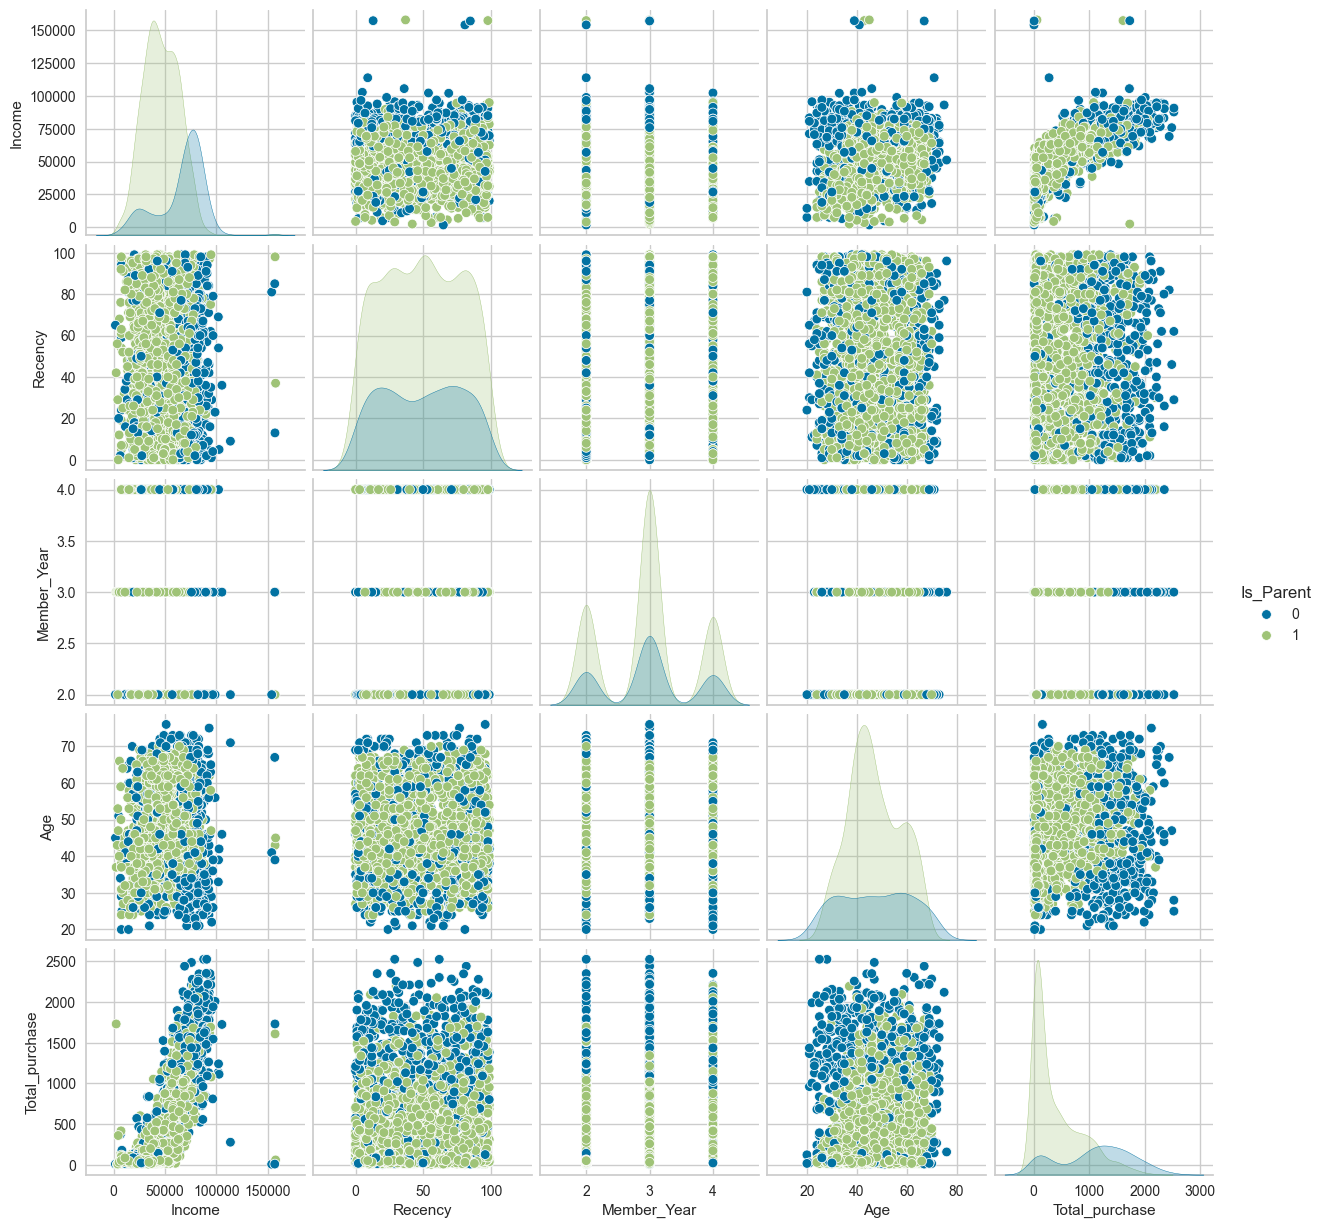

In [60]:
sns.pairplot(data_newfeature[["Income", "Recency", "Member_Year", "Age", "Total_purchase", "Is_Parent"]], hue="Is_Parent")
plt.show()

### One-Hot encoding

In [61]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_data = encoder.fit_transform(data_newfeature[['Education', 'Marital_Status']])

encoded_feature_names = encoder.get_feature_names_out(['Education', 'Marital_Status'])

encoded_df = pd.DataFrame(encoded_data, columns=encoded_feature_names)

data_newfeature.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

data_newfeature = pd.concat([data_newfeature.drop(columns=['Education', 'Marital_Status']), encoded_df], axis=1)


### Collinearity check (again)

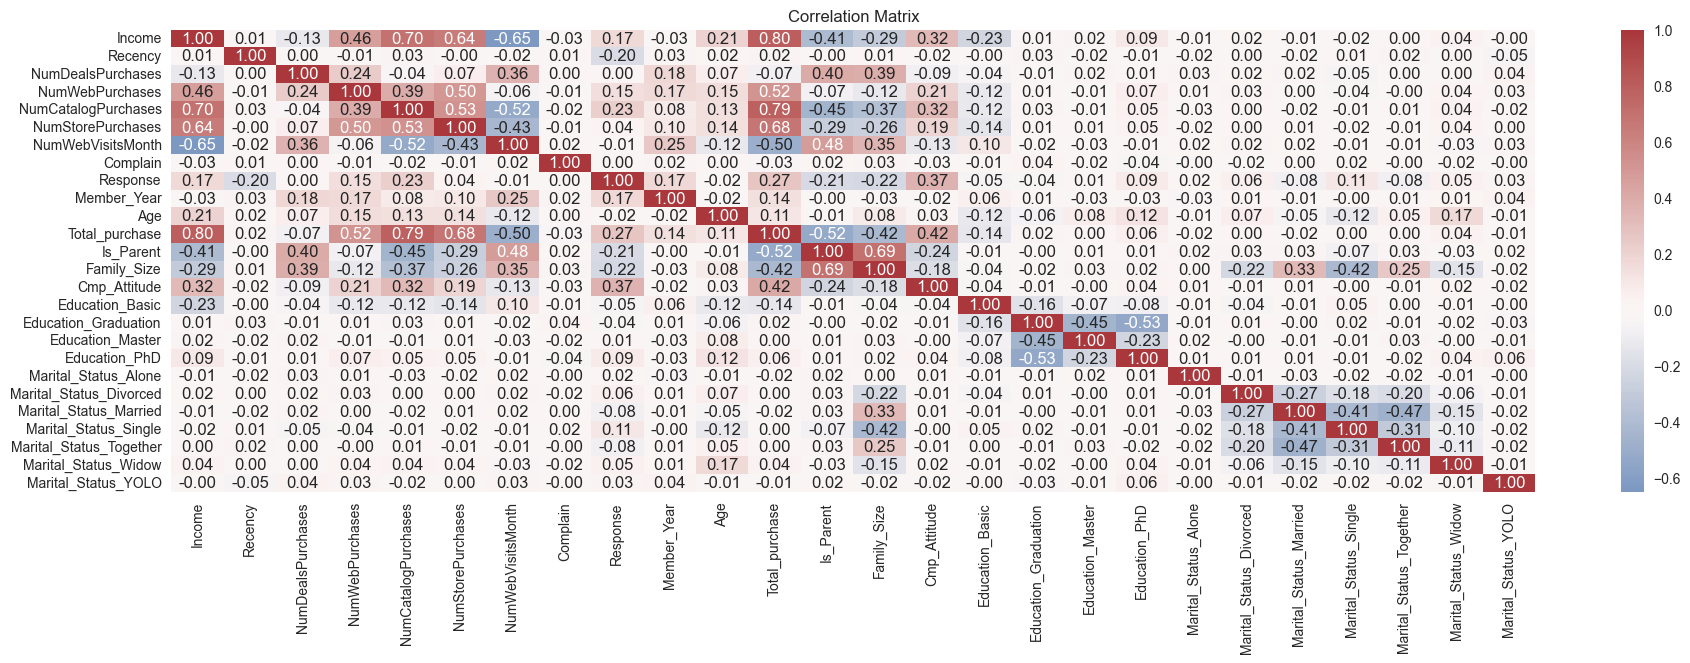

No high correlation.


In [62]:
# Exluding column 
exclude = ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', \
           'MntSweetProducts', 'MntGoldProds', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', \
          'Enroll_Year', 'Enroll_Month', 'Enroll_Day', 'Total_Children', 'Z_CostContact', 'Z_Revenue']
data3 = data_newfeature.loc[:, ~data_newfeature.columns.isin(exclude)] 
corr_matrix2 = data3.corr()
plt.figure(figsize=(22, 6))
sns.heatmap(corr_matrix2, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation Matrix')
plt.show()

# Setting a threshold of 80% as high correlation
high_correlation2 = corr_matrix2[((corr_matrix2 <= -0.8) & (corr_matrix2 != -1)) | ((corr_matrix2 >= 0.8) & (corr_matrix2 != 1))]
if high_correlation2.isnull().all().all():
    print("No high correlation.")
else:
    print("Correlation Matrix for values <= -0.8 or >= 0.8 (excluding self-compare):")
    print(high_correlation2)

In [63]:
data3.isna().sum() # No missing values

Income                     0
Recency                    0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
Complain                   0
Response                   0
Member_Year                0
Age                        0
Total_purchase             0
Is_Parent                  0
Family_Size                0
Cmp_Attitude               0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
dtype: int64

In [64]:
VIF_features2 = add_constant(data3)

VIF2 = pd.Series([variance_inflation_factor(VIF_features2.values, i) for i in range(VIF_features2.shape[1])], \
                 index=VIF_features2.columns)
print(VIF2) # Only the one hot encoded dummies are high, this is not concerning

const                      1193.716323
Income                        4.408355
Recency                       1.066103
NumDealsPurchases             1.683800
NumWebPurchases               1.849005
NumCatalogPurchases           2.955350
NumStorePurchases             2.330429
NumWebVisitsMonth             2.674066
Complain                      1.007681
Response                      1.399651
Member_Year                   1.277120
Age                           1.190459
Total_purchase                5.729186
Is_Parent                     3.310937
Family_Size                   5.088895
Cmp_Attitude                  1.396596
Education_Basic               1.306634
Education_Graduation          3.330311
Education_Master              2.437926
Education_PhD                 2.796885
Marital_Status_Alone          2.514202
Marital_Status_Divorced     105.267764
Marital_Status_Married      268.974572
Marital_Status_Single       190.191461
Marital_Status_Together     217.601778
Marital_Status_Widow     

# Export Preprocessed data

In [65]:
data_newfeature.to_csv('Preprocessed Data.csv', index=False)